# Johnatan Meoño: 19000503
# Parte 1
# Red Neuronal Estandar

In [1]:
import numpy as np
import seaborn as sb 
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
import tensorflow as tf

C:\Users\Johnatan\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [3]:
df = pd.read_csv('airfoil_self_noise.dat', sep="\t", header=None)

In [4]:
df.head()

,0,1,2,3,4,5
0,800,0.0,0.3048,71.3,0.002663,126.201
1,1000,0.0,0.3048,71.3,0.002663,125.201
2,1250,0.0,0.3048,71.3,0.002663,125.951
3,1600,0.0,0.3048,71.3,0.002663,127.591
4,2000,0.0,0.3048,71.3,0.002663,127.461


In [5]:
df.rename(columns={0: 'Frequency, in Hertzs', 1: 'Angle of attack, in degrees.', 
                   2: 'Chord length, in meters.', 3: 'Free-stream velocity, in meters per second.', 
                   4: 'Suction side displacement thickness, in meters.', 5: 'Scaled sound pressure level, in decibels.'}, 
          inplace=True)
df.head()

,"Frequency, in Hertzs","Angle of attack, in degrees.","Chord length, in meters.","Free-stream velocity, in meters per second.","Suction side displacement thickness, in meters.","Scaled sound pressure level, in decibels."
0,800,0.0,0.3048,71.3,0.002663,126.201
1,1000,0.0,0.3048,71.3,0.002663,125.201
2,1250,0.0,0.3048,71.3,0.002663,125.951
3,1600,0.0,0.3048,71.3,0.002663,127.591
4,2000,0.0,0.3048,71.3,0.002663,127.461


In [6]:
## revisando cada columna, para saber si tiene valores NaN
df.isnull().sum()

Frequency, in Hertzs                               0
Angle of attack, in degrees.                       0
Chord length, in meters.                           0
Free-stream velocity, in meters per second.        0
Suction side displacement thickness, in meters.    0
Scaled sound pressure level, in decibels.          0
dtype: int64

# Separación de data4 en: train, validation, test

In [7]:
## esta llamanada sirve para la fucion que separara datos 
from sklearn.model_selection import train_test_split

In [8]:
## convirtiendo data frame de pandas a numpy array
datos = df.values
datos

array([[8.00000e+02, 0.00000e+00, 3.04800e-01, 7.13000e+01, 2.66337e-03,
        1.26201e+02],
       [1.00000e+03, 0.00000e+00, 3.04800e-01, 7.13000e+01, 2.66337e-03,
        1.25201e+02],
       [1.25000e+03, 0.00000e+00, 3.04800e-01, 7.13000e+01, 2.66337e-03,
        1.25951e+02],
       ...,
       [4.00000e+03, 1.56000e+01, 1.01600e-01, 3.96000e+01, 5.28487e-02,
        1.06604e+02],
       [5.00000e+03, 1.56000e+01, 1.01600e-01, 3.96000e+01, 5.28487e-02,
        1.06224e+02],
       [6.30000e+03, 1.56000e+01, 1.01600e-01, 3.96000e+01, 5.28487e-02,
        1.04204e+02]])

In [9]:
print("Rango: ", datos.ndim)
print("Forma: ", datos.shape)
print("Tipy: ", type(datos))
print(datos)

Rango:  2
Forma:  (1503, 6)
Tipy:  <class 'numpy.ndarray'>
[[8.00000e+02 0.00000e+00 3.04800e-01 7.13000e+01 2.66337e-03 1.26201e+02]
 [1.00000e+03 0.00000e+00 3.04800e-01 7.13000e+01 2.66337e-03 1.25201e+02]
 [1.25000e+03 0.00000e+00 3.04800e-01 7.13000e+01 2.66337e-03 1.25951e+02]
 ...
 [4.00000e+03 1.56000e+01 1.01600e-01 3.96000e+01 5.28487e-02 1.06604e+02]
 [5.00000e+03 1.56000e+01 1.01600e-01 3.96000e+01 5.28487e-02 1.06224e+02]
 [6.30000e+03 1.56000e+01 1.01600e-01 3.96000e+01 5.28487e-02 1.04204e+02]]


In [10]:
## separacion de datos 
train_vali, test = train_test_split(datos, test_size=0.20) #, random_state=seem

In [11]:
print("Rango: ", train_vali.ndim)
print("Forma: ", train_vali.shape)
print("Type: ", type(train_vali))
print(train_vali)

Rango:  2
Forma:  (1202, 6)
Type:  <class 'numpy.ndarray'>
[[1.60000e+03 8.90000e+00 1.01600e-01 3.96000e+01 1.24596e-02 1.23820e+02]
 [1.00000e+04 0.00000e+00 1.01600e-01 5.55000e+01 1.31983e-03 1.21930e+02]
 [6.30000e+03 5.40000e+00 1.52400e-01 3.17000e+01 5.25474e-03 1.15591e+02]
 ...
 [1.60000e+03 9.50000e+00 2.54000e-02 7.13000e+01 4.20654e-03 1.33756e+02]
 [1.60000e+03 1.50000e+00 3.04800e-01 7.13000e+01 3.36729e-03 1.26632e+02]
 [2.00000e+03 1.54000e+01 5.08000e-02 7.13000e+01 2.64269e-02 1.29285e+02]]


# Test

In [12]:
print("Rango: ", test.ndim)
print("Forma: ", test.shape)
print("Tipy: ", type(test))
print(test)

Rango:  2
Forma:  (301, 6)
Tipy:  <class 'numpy.ndarray'>
[[4.00000e+02 1.23000e+01 1.01600e-01 3.17000e+01 4.18756e-02 1.23207e+02]
 [4.00000e+02 1.54000e+01 5.08000e-02 7.13000e+01 2.64269e-02 1.26805e+02]
 [3.15000e+03 1.50000e+00 3.04800e-01 3.96000e+01 3.92107e-03 1.19111e+02]
 ...
 [1.00000e+04 0.00000e+00 2.54000e-02 5.55000e+01 4.12290e-04 1.34563e+02]
 [5.00000e+02 1.54000e+01 5.08000e-02 3.17000e+01 2.89853e-02 1.23695e+02]
 [8.00000e+02 3.30000e+00 1.01600e-01 7.13000e+01 2.02822e-03 1.31074e+02]]


# Equis de test o prueba

In [13]:
X_test = test[:,0:5]
X_test

array([[4.00000e+02, 1.23000e+01, 1.01600e-01, 3.17000e+01, 4.18756e-02],
       [4.00000e+02, 1.54000e+01, 5.08000e-02, 7.13000e+01, 2.64269e-02],
       [3.15000e+03, 1.50000e+00, 3.04800e-01, 3.96000e+01, 3.92107e-03],
       ...,
       [1.00000e+04, 0.00000e+00, 2.54000e-02, 5.55000e+01, 4.12290e-04],
       [5.00000e+02, 1.54000e+01, 5.08000e-02, 3.17000e+01, 2.89853e-02],
       [8.00000e+02, 3.30000e+00, 1.01600e-01, 7.13000e+01, 2.02822e-03]])

# yes de test o prueba

In [14]:
Y_test = test[:,5]
Y_test = Y_test.reshape(301,1)
print("Rango: ", Y_test.ndim)
print("Forma: ", Y_test.shape)
print("Tipy: ", type(Y_test))
print(Y_test)

Rango:  2
Forma:  (301, 1)
Tipy:  <class 'numpy.ndarray'>
[[123.207]
 [126.805]
 [119.111]
 [118.667]
 [117.809]
 [126.835]
 [132.886]
 [126.413]
 [125.201]
 [110.839]
 [127.398]
 [124.42 ]
 [122.235]
 [123.118]
 [128.311]
 [127.358]
 [119.505]
 [120.534]
 [120.147]
 [113.796]
 [125.741]
 [125.094]
 [128.583]
 [123.263]
 [129.095]
 [124.214]
 [122.082]
 [116.659]
 [123.514]
 [133.402]
 [129.579]
 [116.924]
 [120.324]
 [135.433]
 [120.509]
 [132.043]
 [121.238]
 [124.233]
 [134.938]
 [119.806]
 [126.933]
 [121.582]
 [130.934]
 [132.769]
 [133.503]
 [122.088]
 [134.568]
 [121.106]
 [116.366]
 [133.894]
 [116.02 ]
 [123.255]
 [124.17 ]
 [128.416]
 [119.174]
 [120.015]
 [130.049]
 [134.228]
 [132.271]
 [127.893]
 [133.847]
 [119.737]
 [135.328]
 [126.54 ]
 [135.54 ]
 [135.38 ]
 [122.779]
 [125.867]
 [122.088]
 [126.59 ]
 [126.644]
 [129.292]
 [126.736]
 [125.816]
 [124.685]
 [125.647]
 [120.555]
 [132.116]
 [130.206]
 [126.616]
 [119.639]
 [126.959]
 [130.307]
 [122.365]
 [125.499]
 [126.4

# Train validation

In [15]:
train, validation = train_test_split(train_vali, 
                                     test_size=0.20) #, random_state=seem

# Train 

In [16]:
print("Rango: ", train.ndim)
print("Forma: ", train.shape)
print("Type: ", type(train))
print(train)

Rango:  2
Forma:  (961, 6)
Type:  <class 'numpy.ndarray'>
[[1.60000e+03 1.23000e+01 1.01600e-01 3.96000e+01 4.08268e-02 1.17875e+02]
 [1.60000e+03 1.97000e+01 5.08000e-02 7.13000e+01 3.41183e-02 1.20575e+02]
 [1.00000e+03 5.40000e+00 1.52400e-01 3.96000e+01 4.85029e-03 1.30507e+02]
 ...
 [3.15000e+02 9.50000e+00 2.54000e-02 3.17000e+01 4.61377e-03 1.22766e+02]
 [8.00000e+02 1.74000e+01 2.54000e-02 5.55000e+01 1.65706e-02 1.23091e+02]
 [2.50000e+03 0.00000e+00 1.52400e-01 5.55000e+01 1.72668e-03 1.27763e+02]]


# Equis de train o etrenamiento

In [17]:
## features o x
X_train = train[:,0:5]
print("Rango: ", X_train .ndim)
print("Forma: ", X_train .shape)
print("Tipy: ", type(X_train ))
print(X_train )

Rango:  2
Forma:  (961, 5)
Tipy:  <class 'numpy.ndarray'>
[[1.60000e+03 1.23000e+01 1.01600e-01 3.96000e+01 4.08268e-02]
 [1.60000e+03 1.97000e+01 5.08000e-02 7.13000e+01 3.41183e-02]
 [1.00000e+03 5.40000e+00 1.52400e-01 3.96000e+01 4.85029e-03]
 ...
 [3.15000e+02 9.50000e+00 2.54000e-02 3.17000e+01 4.61377e-03]
 [8.00000e+02 1.74000e+01 2.54000e-02 5.55000e+01 1.65706e-02]
 [2.50000e+03 0.00000e+00 1.52400e-01 5.55000e+01 1.72668e-03]]


# yes de train o entrenamiento

In [18]:
## Y 
## extrayendo solo la columna 5 que son las y, recordar que en pyton se cuenta a partir de cero
## 0, 1, 2, 3, 4, 5, 6
Y_train = train[:,5]
Y_train = Y_train.reshape(961,1)
print("Rango: ", Y_train.ndim)
print("Forma: ", Y_train.shape)
print("Tipy: ", type(Y_train))
print(Y_train)

Rango:  2
Forma:  (961, 1)
Tipy:  <class 'numpy.ndarray'>
[[117.875]
 [120.575]
 [130.507]
 [124.809]
 [130.311]
 [135.346]
 [134.111]
 [122.771]
 [121.225]
 [131.346]
 [122.211]
 [129.235]
 [128.809]
 [129.057]
 [135.164]
 [121.903]
 [133.376]
 [127.92 ]
 [114.861]
 [133.774]
 [130.644]
 [131.796]
 [128.677]
 [117.514]
 [119.319]
 [135.468]
 [124.393]
 [121.933]
 [118.416]
 [127.307]
 [113.08 ]
 [135.484]
 [130.307]
 [136.883]
 [136.191]
 [125.157]
 [129.038]
 [117.087]
 [125.452]
 [123.069]
 [121.514]
 [120.472]
 [130.791]
 [129.308]
 [109.52 ]
 [123.583]
 [122.044]
 [126.43 ]
 [108.625]
 [118.41 ]
 [137.076]
 [134.058]
 [121.055]
 [131.978]
 [128.977]
 [128.354]
 [117.649]
 [126.049]
 [110.689]
 [131.234]
 [126.534]
 [129.27 ]
 [120.076]
 [137.233]
 [116.417]
 [128.412]
 [123.209]
 [129.949]
 [127.011]
 [121.762]
 [112.589]
 [129.491]
 [123.689]
 [123.392]
 [115.298]
 [125.717]
 [115.608]
 [124.458]
 [125.305]
 [129.006]
 [135.079]
 [130.955]
 [129.673]
 [130.195]
 [125.465]
 [123.9

# validation

In [19]:
print("Rango: ", validation.ndim)
print("Forma: ", validation.shape)
print("Tipy: ", type(validation))
print(validation)

Rango:  2
Forma:  (241, 6)
Tipy:  <class 'numpy.ndarray'>
[[1.60000e+03 0.00000e+00 2.28600e-01 3.17000e+01 2.72380e-03 1.25625e+02]
 [6.30000e+03 5.40000e+00 1.52400e-01 3.17000e+01 5.25474e-03 1.15591e+02]
 [1.25000e+03 6.70000e+00 1.01600e-01 3.96000e+01 5.78076e-03 1.32395e+02]
 ...
 [2.50000e+03 7.20000e+00 1.52400e-01 3.96000e+01 9.09175e-03 1.17478e+02]
 [1.00000e+03 4.00000e+00 3.04800e-01 3.96000e+01 5.79636e-03 1.28723e+02]
 [5.00000e+03 1.23000e+01 1.01600e-01 3.17000e+01 4.18756e-02 1.07147e+02]]


# equis de validación

In [20]:
X_validation = validation[:,0:5]
print("Rango: ", X_validation.ndim)
print("Forma: ", X_validation.shape)
print("Tipy: ", type(X_train ))
print(X_validation)

Rango:  2
Forma:  (241, 5)
Tipy:  <class 'numpy.ndarray'>
[[1.60000e+03 0.00000e+00 2.28600e-01 3.17000e+01 2.72380e-03]
 [6.30000e+03 5.40000e+00 1.52400e-01 3.17000e+01 5.25474e-03]
 [1.25000e+03 6.70000e+00 1.01600e-01 3.96000e+01 5.78076e-03]
 ...
 [2.50000e+03 7.20000e+00 1.52400e-01 3.96000e+01 9.09175e-03]
 [1.00000e+03 4.00000e+00 3.04800e-01 3.96000e+01 5.79636e-03]
 [5.00000e+03 1.23000e+01 1.01600e-01 3.17000e+01 4.18756e-02]]


# yes de validación

In [21]:
Y_validation = validation[:,5]
Y_validation = Y_validation.reshape(241,1)
print("Rango: ", Y_validation.ndim)
print("Forma: ", Y_validation.shape)
print("Type: ", type(Y_validation))
print(Y_validation)

Rango:  2
Forma:  (241, 1)
Type:  <class 'numpy.ndarray'>
[[125.625]
 [115.591]
 [132.395]
 [138.537]
 [134.928]
 [108.185]
 [119.229]
 [124.647]
 [120.037]
 [120.319]
 [119.375]
 [127.634]
 [126.54 ]
 [118.134]
 [124.155]
 [116.815]
 [123.865]
 [125.484]
 [112.139]
 [128.444]
 [121.474]
 [130.335]
 [126.266]
 [121.944]
 [121.851]
 [122.101]
 [122.45 ]
 [126.843]
 [132.251]
 [130.817]
 [133.587]
 [110.307]
 [123.303]
 [127.206]
 [122.708]
 [115.234]
 [132.095]
 [126.159]
 [130.595]
 [128.296]
 [120.779]
 [124.024]
 [130.46 ]
 [133.294]
 [124.049]
 [124.612]
 [127.591]
 [130.94 ]
 [120.657]
 [130.089]
 [125.966]
 [118.994]
 [126.086]
 [112.169]
 [126.675]
 [132.184]
 [122.816]
 [133.758]
 [121.399]
 [125.963]
 [119.561]
 [124.253]
 [121.728]
 [129.116]
 [128.086]
 [129.653]
 [122.428]
 [127.53 ]
 [130.787]
 [133.201]
 [135.308]
 [115.91 ]
 [115.466]
 [120.505]
 [122.035]
 [132.358]
 [134.308]
 [111.911]
 [129.8  ]
 [125.353]
 [108.689]
 [113.055]
 [139.918]
 [120.755]
 [120.654]
 [117.2

# Red Neuronal Estandar

# Grafo

In [232]:
grafofefonet = tf.Graph()
with grafofefonet.as_default():
    
    with tf.name_scope("Declaring_placeholder"):    
        ## definiendo las X, 784 es el valor pues 784 son las x features luego del reshape 
        X = tf.placeholder(tf.float32, [None,5], name="X")
    
        ## definiendo las Y, 3 es el valor pues tres son las categorias
        Y = tf.placeholder(tf.float32, [None,1], name="Y")
    
        # estableciendo el learning rate placeholder
        ph_lr_g = tf.placeholder(dtype = tf.float64, name="LR")
        
    with tf.name_scope("Declaring_variables"):
        ## Matriz de parametros CAPA INTEMEDIA 1 
        ## inicializacion JAVIER de adentro hacia fuera suma, division, raiz y como es un flota 64 se pasa a float 32
        ## tf.cast(tf.sqrt(tf.divide(2,tf.add(5,3))),tf.float32)
        W_kpa_inter_1_g = tf.Variable(tf.multiply(tf.random_normal([5,3]),tf.cast(tf.sqrt(tf.divide(2,tf.add(5,3))),tf.float32)), name = "W1") 
        #W_kpa_inter_1_g = tf.Variable(tf.random_normal([5,3]), name = "W1") #tf.sqrt(tf.divide(2,tf.add(5,3)))
    
        ## Vector bias o de termino independiente CAPA INTEMEDIA 1
        B_kpa_inter_1_g = tf.Variable(tf.random_normal([1,3]), name = "B1")
        
        ## Matriz de parametros CAPA INTEMEDIA 2
        W_kpa_inter_2_g = tf.Variable(tf.multiply(tf.random_normal([3,2]),tf.cast(tf.sqrt(tf.divide(2,tf.add(3,2))),tf.float32)), name = "W2")
        #W_kpa_inter_2_g = tf.Variable(tf.random_normal([3,2]), name = "W2")
    
        ## Vector bias o de termino independiente CAPA INTEMEDIA 2
        B_kpa_inter_2_g = tf.Variable(tf.random_normal([1,2]), name = "B2")
        
        ## Matriz de parametros CAPA FINAL
        W_kpa_final_g = tf.Variable(tf.multiply(tf.random_normal([2,1]),tf.cast(tf.sqrt(tf.divide(2,tf.add(2,1))),tf.float32)), name = "Wf")
        #W_kpa_final_g = tf.Variable(tf.random_normal([2,1]), name = "Wf")
    
        ## Vector bias o de termino independiente CAPA FINAL
        B_kpa_final_g = tf.Variable(tf.random_normal([1,1]), name = "Bf")
    
    with tf.name_scope("hipotesis"):   
        ## CAPA INTEMEDIA 1 
        kpa_inter_1 = tf.add(tf.matmul(X, W_kpa_inter_1_g, name="hipotesis_producto_punto"), B_kpa_inter_1_g, name="hipotesis_sumar_B") 
        kpa_inter_1_act = tf.nn.relu(kpa_inter_1)
        
        ## CAPA INTEMEDIA 2 
        kpa_inter_2 = tf.add(tf.matmul(kpa_inter_1_act, W_kpa_inter_2_g, name="hipotesis_producto_punto"), B_kpa_inter_2_g, name="hipotesis_sumar_B") 
        kpa_inter_2_act = tf.nn.relu(kpa_inter_2)
        
        ## CAPA FINAL
        kpa_final = tf.add(tf.matmul(kpa_inter_2_act, W_kpa_final_g, name="hipotesis_producto_punto"), B_kpa_final_g, name="hipotesis_sumar_B") 
        kpa_final_act = tf.nn.relu(kpa_final) #activacion de la salida relu pues el decibel mas bajo es cero 
        
    with tf.name_scope("funcion_costo"):
        # calculando la fucion de costo MSE que es fatible usar para activación identidad y relu ver referencias 
        costo_g = tf.losses.mean_squared_error(Y,kpa_final_act)
        
    with tf.name_scope("Gradient_Des.Optimizer"):
          
        ## gradient descent para optimizar un nodo mas del grafo
        optimizacion_g = tf.train.GradientDescentOptimizer(ph_lr_g).minimize(costo_g)

In [365]:
def entrenamiento(equis,yes,batch_size,epochs,lr,imprimir_cada,XV,YV,XP,YP):
    
    with tf.Session(graph = grafofefonet) as session:
        batches = int(equis.shape[0] / batch_size)
        iteracion_k = []
        costo_k = []
        # incializando variables
        tf.global_variables_initializer().run()
        print('Initialized')
        
        for epoch in range(epochs):
            for i in range(batches):
                offset = i * epoch 
                x = equis[offset: offset + batch_size] 
                y = yes[offset: offset + batch_size]
                
            # sesion que ejecuta los nodos y envia informacion con feed_dict al nodo del learning rate
            costo_s, optimizacion_s = session.run([costo_g, optimizacion_g],feed_dict={X:x, Y:y, ph_lr_g:lr})
            
            iteracion_k.append(epoch)
            costo_k.append(costo_s)
        
            if (epoch % imprimir_cada == 0):
                print("Iteracion:", epoch, "Error:", costo_s) ##
        
        ## usando el grafo con los datos de validación 
        costo_v_s, pronostico_v_s = session.run([costo_g, kpa_final_act], feed_dict={X:XV, Y:YV})
        
        ## usando el grafo con los datos de prueba
        costo_p_s, pronostico_p_s = session.run([costo_g, kpa_final_act], feed_dict={X:XP, Y:YP})
                       
    cadena_config = "AS""_Reg""_GD""_epochs="+str(epochs)+"_LR="+str(lr)
    
    ## Gráfica 
    fig  = plt.figure(figsize=(10,5))
    ax1 = fig.add_subplot(1,1,1)
    ax1.scatter(iteracion_k,costo_k)
    plt.show()
    
    TableOut = pd.DataFrame({'Iteración k':iteracion_k, 'Costo':costo_k}) #, 'W_k':w_k, 'Dirección': pk, 'Norma': norma_k
    return cadena_config, costo_s, costo_v_s, costo_p_s, pronostico_p_s   

Initialized
Iteracion: 0 Error: 16053.458
Iteracion: 5 Error: 15482.548
Iteracion: 10 Error: 15320.475
Iteracion: 15 Error: 15590.088
Iteracion: 20 Error: 15717.641
Iteracion: 25 Error: 16148.393
Iteracion: 30 Error: 15500.679


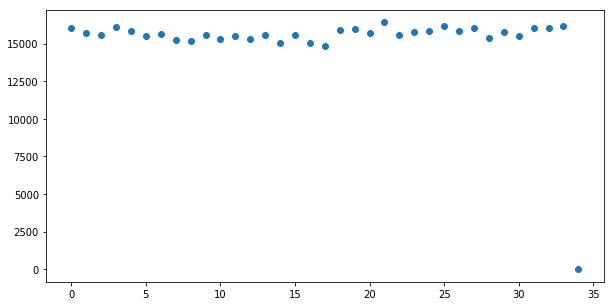

In [407]:
kdnacon_1, costo_train_1, costo_val_1, costo_p_1, pronostico_1 = entrenamiento(X_train,Y_train,32,35,1,5,X_validation,Y_validation,X_test,Y_test)

Initialized
Iteracion: 0 Error: 1058297.0
Iteracion: 5 Error: 15482.548
Iteracion: 10 Error: 15320.475
Iteracion: 15 Error: 15590.088
Iteracion: 20 Error: 15717.641
Iteracion: 25 Error: 16148.393
Iteracion: 30 Error: 15500.679


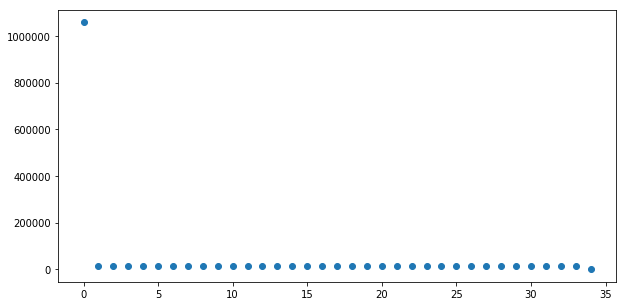

In [408]:
kdnacon_2, costo_train_2, costo_val_2, costo_p_2, pronostico_2 = entrenamiento(X_train,Y_train,32,35,0.1,5,X_validation,Y_validation,X_test,Y_test)

Initialized
Iteracion: 0 Error: 16053.458
Iteracion: 5 Error: 15482.548
Iteracion: 10 Error: 15320.475
Iteracion: 15 Error: 15590.088
Iteracion: 20 Error: 15717.641
Iteracion: 25 Error: 16148.393
Iteracion: 30 Error: 15500.679


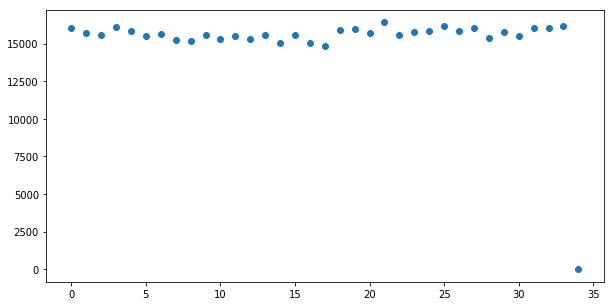

In [409]:
kdnacon_3, costo_train_3, costo_val_3, costo_p_3, pronostico_3 = entrenamiento(X_train,Y_train,32,35,0.01,5,X_validation,Y_validation,X_test,Y_test)

Initialized
Iteracion: 0 Error: 37529.152
Iteracion: 5 Error: 15482.548
Iteracion: 10 Error: 15320.475
Iteracion: 15 Error: 15590.088
Iteracion: 20 Error: 15717.641
Iteracion: 25 Error: 16148.393
Iteracion: 30 Error: 15500.679


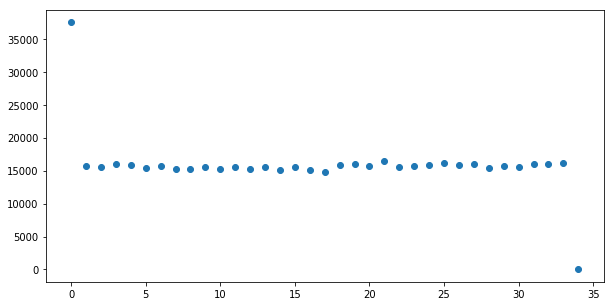

In [410]:
kdnacon_4, costo_train_4, costo_val_4, costo_p_4, pronostico_4 = entrenamiento(X_train,Y_train,32,35,0.001,5,X_validation,Y_validation,X_test,Y_test)

Initialized
Iteracion: 0 Error: 90262.44
Iteracion: 5 Error: 15482.548
Iteracion: 10 Error: 15320.475
Iteracion: 15 Error: 15590.088
Iteracion: 20 Error: 15717.641
Iteracion: 25 Error: 16148.393
Iteracion: 30 Error: 15500.679


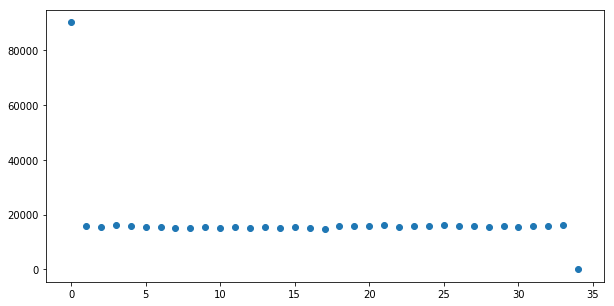

In [411]:
kdnacon_5, costo_train_5, costo_val_5, costo_p_5, pronostico_5 = entrenamiento(X_train,Y_train,32,35,0.0001,5,X_validation,Y_validation,X_test,Y_test)

# Resumen de modelos

In [371]:
cadenas = [kdnacon_1,kdnacon_2,kdnacon_3,kdnacon_4,kdnacon_5]
cadenas

['AS_Reg_GD_epochs=35_LR=1',
 'AS_Reg_GD_epochs=35_LR=0.1',
 'AS_Reg_GD_epochs=35_LR=0.01',
 'AS_Reg_GD_epochs=35_LR=0.001',
 'AS_Reg_GD_epochs=35_LR=0.0001']

In [358]:
MSES_T = [costo_train_1,costo_train_2,costo_train_3,costo_train_4,costo_train_5]
MSES_T

[0.0, 0.0, 0.0, 0.0, 0.0]

In [359]:
MSES_V = [costo_val_1,costo_val_2,costo_val_3,costo_val_4,costo_val_5]
MSES_V

[15548.5, 49.85761, 15548.5, 13219.435, 15548.5]

In [360]:
Tabla_Resumen = pd.DataFrame(data = {'Cadena de configuración':cadenas,'Train error':MSES_T, 'Validation error':MSES_V}) #
Tabla_Resumen

,Cadena de configuración,Train error,Validation error
0,AS_Reg_GD_epochs=50_LR=1,0.0,15548.500000
1,AS_Reg_GD_epochs=50_LR=0.1,0.0,49.857609
2,AS_Reg_GD_epochs=50_LR=0.01,0.0,15548.500000
3,AS_Reg_GD_epochs=50_LR=0.001,0.0,13219.434570
4,AS_Reg_GD_epochs=50_LR=0.0001,0.0,15548.500000


# Prónostico con datos de test o prueba

In [361]:
#pronostico_2

In [362]:
#Y_test

In [363]:
#costo_p_2

In [364]:
print("MSE: ", costo_p_2)
Tabla_Resumen_1 = pd.DataFrame(data = {'Y observada':Y_test.tolist(),'Y pronosticada':pronostico_2.tolist()})  
Tabla_Resumen_1

MSE:  48.027393


,Y observada,Y pronosticada
0,[123.20700000000001],[125.8097152709961]
1,[126.805],[125.8097152709961]
2,[119.111],[125.8097152709961]
3,[118.667],[125.8097152709961]
4,[117.809],[125.8097152709961]
5,[126.835],[125.8097152709961]
6,[132.886],[125.8097152709961]
7,[126.413],[125.8097152709961]
8,[125.20100000000001],[125.8097152709961]
9,[110.839],[125.8097152709961]


# Referencias

https://archive.ics.uci.edu/ml/datasets/Airfoil+Self-Noise#

https://riptutorial.com/es/pandas/example/5744/renombrar-una-columna

https://stackoverflow.com/questions/46473270/import-dat-file-as-an-array

http://ruder.io/optimizing-gradient-descent/

http://www.cochlea.org/es/sonidos/campo-auditivo-humano

https://towardsdatascience.com/deep-learning-which-loss-and-activation-functions-should-i-use-ac02f1c56aa8

https://towardsdatascience.com/weight-initialization-techniques-in-neural-networks-26c649eb3b78